Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series
analysis and prediction system using RNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('C:\\Users\\shruti\\Desktop\\DL Practicals\\DL Practical 4\\google_train.csv', usecols=range(6))
   


In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,73.0
1,01-04-2012,331.27,333.87,329.08,666.45,57.0
2,01-05-2012,329.83,330.75,326.89,657.21,65.0
3,01-06-2012,328.34,328.77,323.68,648.24,54.0
4,01-09-2012,322.04,322.29,309.46,620.76,1.0


In [4]:
training_set = dataset_train.iloc[:, 1: 2].values

In [5]:
training_set.shape

(1258, 1)

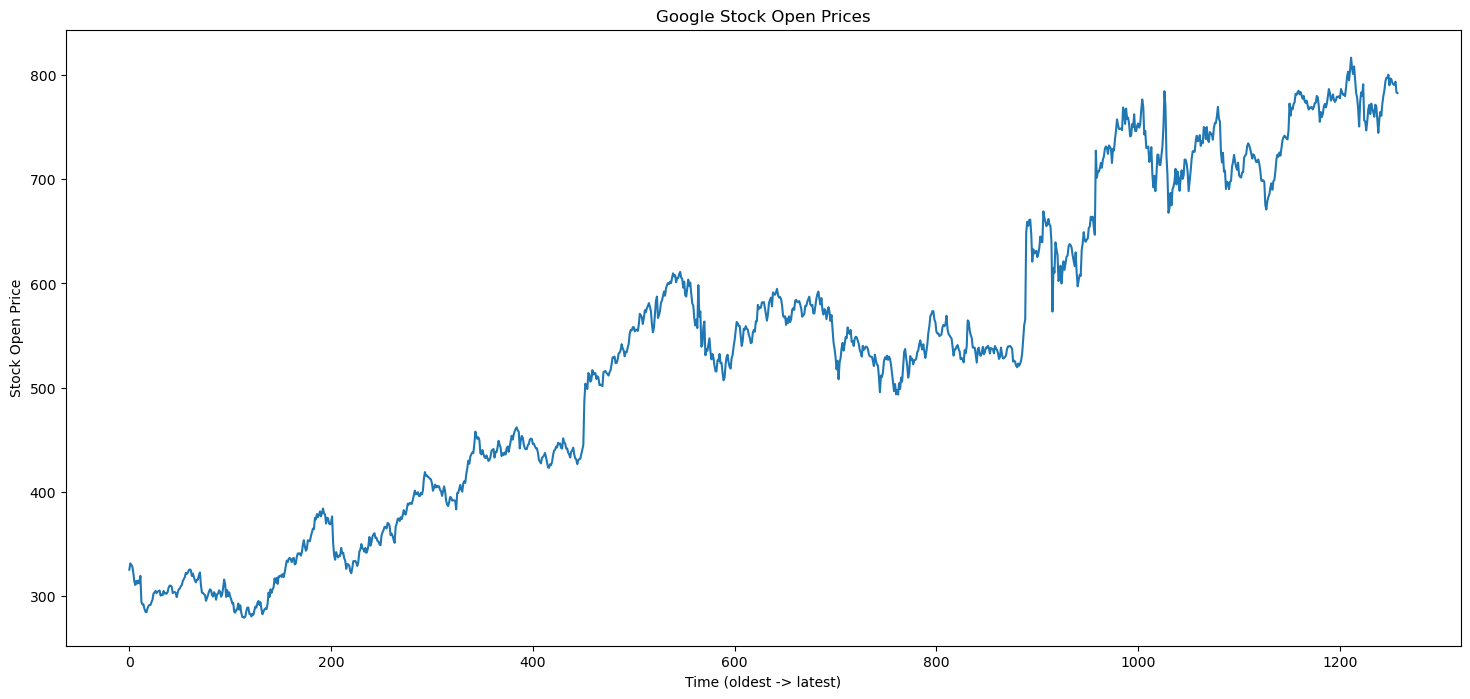

In [6]:
 plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [7]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1198, 60)

In [11]:
y_train.shape


(1198,)

In [12]:
X_train = np.reshape(X_train, newshape =
(X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape


(1198, 60, 1)

In [14]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - loss: 0.0764
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0063
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0055
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0052
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0049
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0049
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0052
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0047
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0048
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99

In [18]:
dataset_test = pd.read_csv('C:\\Users\\shruti\\Desktop\\DL Practicals\\DL Practical 4\\google_test.csv', usecols=range(6))

In [19]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,16
1,01-04-2017,788.36,791.34,783.16,786.90,10
2,01-05-2017,786.08,794.48,785.02,794.02,13
3,01-06-2017,795.26,807.90,792.20,806.15,16
4,01-09-2017,806.40,809.97,802.83,806.65,12


In [20]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [22]:
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)

In [23]:
len(inputs)


80

In [24]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
X_test.shape

(20, 60, 1)

In [26]:
predicted_stock_price = regressor.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [27]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

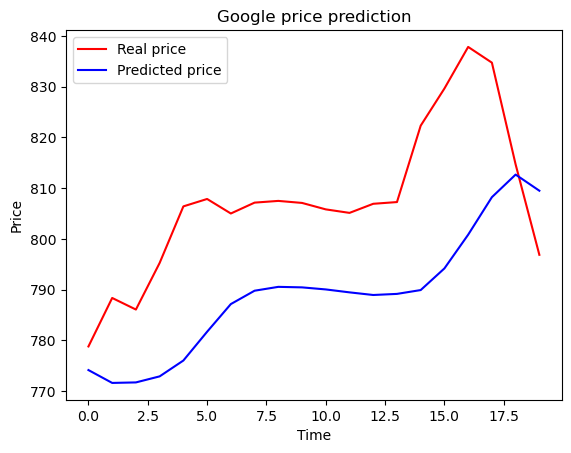

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
